In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# K Nearest Neighbor(KNN)

In [2]:
df=pd.read_csv('Downloads/Churn_Modelling.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
x=df[['CustomerId','CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']].values
x[0:5]

array([[1.5634602e+07, 6.1900000e+02, 4.2000000e+01, 2.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0134888e+05],
       [1.5647311e+07, 6.0800000e+02, 4.1000000e+01, 1.0000000e+00,
        8.3807860e+04, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.1254258e+05],
       [1.5619304e+07, 5.0200000e+02, 4.2000000e+01, 8.0000000e+00,
        1.5966080e+05, 3.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        1.1393157e+05],
       [1.5701354e+07, 6.9900000e+02, 3.9000000e+01, 1.0000000e+00,
        0.0000000e+00, 2.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        9.3826630e+04],
       [1.5737888e+07, 8.5000000e+02, 4.3000000e+01, 2.0000000e+00,
        1.2551082e+05, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        7.9084100e+04]])

In [6]:
y=df[['Exited']].values
y[0:10]

array([[1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0]], dtype=int64)

In [7]:
from sklearn import preprocessing

In [8]:
x=preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:10]

array([[-0.78321342, -0.32622142,  0.29351742, -1.04175968, -1.22584767,
        -0.91158349,  0.64609167,  0.97024255,  0.02188649],
       [-0.60653412, -0.44003595,  0.19816383, -1.38753759,  0.11735002,
        -0.91158349, -1.54776799,  0.97024255,  0.21653375],
       [-0.99588476, -1.53679418,  0.29351742,  1.03290776,  1.33305335,
         2.52705662,  0.64609167, -1.03067011,  0.2406869 ],
       [ 0.14476652,  0.50152063,  0.00745665, -1.38753759, -1.22584767,
         0.80773656, -1.54776799, -1.03067011, -0.10891792],
       [ 0.65265871,  2.06388377,  0.38887101, -1.04175968,  0.7857279 ,
        -0.91158349,  0.64609167,  0.97024255, -0.36527578],
       [-1.62552983, -0.05720525,  0.4842246 ,  1.03290776,  0.59732859,
         0.80773656,  0.64609167, -1.03067011,  0.86365029],
       [-1.36808046,  1.77417405,  1.05634615,  0.68712986, -1.22584767,
         0.80773656,  0.64609167,  0.97024255, -1.56548722],
       [-0.48368298, -2.84048792, -0.94607926, -0.35020386,  0

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print("TRAIN:",x_train.shape,y_train.shape)
print("TEST:",x_test.shape,y_test.shape)

TRAIN: (8000, 9) (8000, 1)
TEST: (2000, 9) (2000, 1)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [12]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

array([0.7875, 0.8345, 0.829 , 0.834 , 0.832 , 0.84  , 0.8375, 0.8385,
       0.841 ])

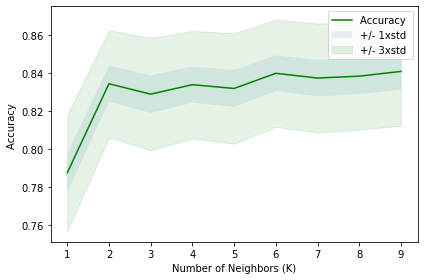

In [13]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [14]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.841 with k= 9


In [15]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.8315677966101694

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 112  271]
 [  47 1570]]


Confusion matrix, without normalization
[[ 112  271]
 [  47 1570]]


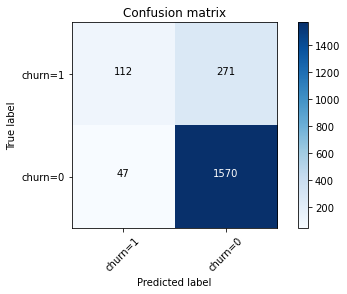

In [17]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [18]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1617
           1       0.70      0.29      0.41       383

    accuracy                           0.84      2000
   macro avg       0.78      0.63      0.66      2000
weighted avg       0.82      0.84      0.81      2000



# Decision Trees

In [19]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.12, random_state=3)

In [20]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (8800, 9) &  Size of Y training set (8800, 1)


In [21]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [22]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [23]:
predTree = drugTree.predict(X_testset)

In [24]:
print (predTree [0:5])
print (y_testset [0:5])


[0 0 0 0 0]
[[0]
 [0]
 [1]
 [0]
 [0]]


In [25]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.8516666666666667


In [26]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

In [27]:
from sklearn.metrics import jaccard_score
jaccard_score(y_testset,predTree,pos_label=0)


0.843859649122807

[[ 112  271]
 [  47 1570]]
Confusion matrix, without normalization
[[ 112  271]
 [  47 1570]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1617
           1       0.70      0.29      0.41       383

    accuracy                           0.84      2000
   macro avg       0.78      0.63      0.66      2000
weighted avg       0.82      0.84      0.81      2000



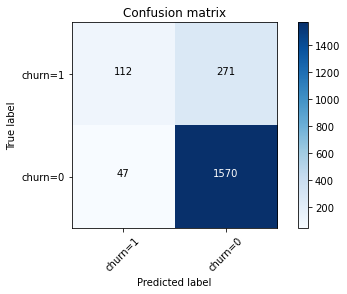

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')
print (classification_report(y_test, yhat))

# Support Vector Machine(SVM)

In [29]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8000, 9) (8000, 1)
Test set: (2000, 9) (2000, 1)


In [30]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
yhat [0:5]

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0, 0, 0, 0, 0], dtype=int64)

In [31]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,yhat,pos_label=0)


0.8456556934700485

[[ 147  249]
 [  37 1567]]
Confusion matrix, without normalization
[[ 147  249]
 [  37 1567]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1604
           1       0.80      0.37      0.51       396

    accuracy                           0.86      2000
   macro avg       0.83      0.67      0.71      2000
weighted avg       0.85      0.86      0.84      2000



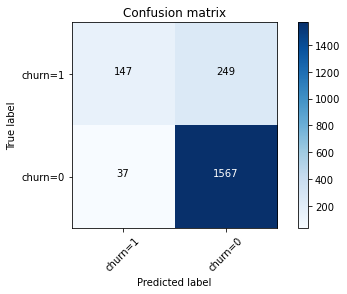

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')
print (classification_report(y_test, yhat))

# Logistic Regression

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6000, 9) (6000, 1)
Test set: (4000, 9) (4000, 1)


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR
yhat = LR.predict(X_test)
yhat

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [35]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.83, 0.17],
       [0.76, 0.24],
       [0.87, 0.13],
       ...,
       [0.29, 0.71],
       [0.83, 0.17],
       [0.82, 0.18]])

In [36]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.806958762886598

[[ 120  667]
 [  82 3131]]
Confusion matrix, without normalization
[[ 120  667]
 [  82 3131]]


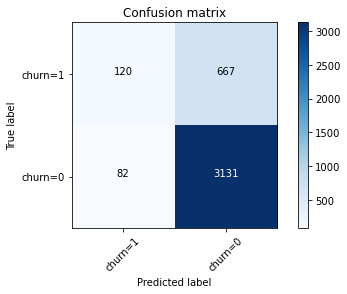

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [38]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.4380538507459728